# Figuritas del Mundial

¿Cuantos paquetes necesito para sin intercambiar figuritas llenar el álbum en promedio?

Sponiendo que:
>* Todas las figuritas tienen la misma probabilidad de encontrarse en un sobre (es decir, no existe la difícil)
>* En sobre puedo haber una misma figurita repetida  🤯 
>* Soy una persona insociable, sin amigos por lo que NO intercambio figuritas con nadie.

Varias etapas:
>* Tengo un albúm vacío
>* Compro la figuritas
>* Las pego
>* Me fijo si el albún está lleno -> Si está cuento la cantidad de paquetes y empiezo otro albúm.
>* Empiezo el proceso de nuevo, salvo que haya llegado a la cantidad de álbumes llenos.


In [1]:
# Cargo las librerías
import numpy as np
import matplotlib.pyplot as plt

## Datos de  la realidad

Proveídos por alumnos del semestre 2022B

In [2]:
Cantidad_de_figus = 638  # Cantidad de figuritas que existen diferentes
Por_paquete = 5
Valor_del_paquete = 150

# De esta manera un álbun sería de la forma:
album = np.zeros(Cantidad_de_figus)

Variables:

>* Paquete <- Figuritas en el paquete que compro 
>* Album <- El album que estoy llenando
>* Album_paquete <- Es un vector donde cada componente tiene la cantidad de figus que necesité para llenarlo 



Funciones que voy a usar, definidas por su actividad. Cada una realiza una tarea muy sencilla:

In [3]:
# genero 5 números al azar, simulo la compra 
# de un paquete de figuritas

def Compro():
  return np.random.randint(1,Cantidad_de_figus+1, size=5)    

In [4]:
# Pego las figuritas en el albún. Un 0 en la posición
# significa que no poseo dicha figu, pero un 1 que si 
# la tengo.

def Pego(paquete,album,Por_paquete):
    for i in range(Por_paquete):
        album[paquete[i]]=1
    return album
              
             

In [5]:
# Me fijo si se llenó el albún, retorno un True o False

def Me_fijo(album):
     return album.sum()<Cantidad_de_figus

### Probemos si funciona

In [8]:
paquete=Compro()
print("Figuritas en el paquete:",paquete)

album = np.zeros(Cantidad_de_figus)

album=Pego(paquete,album,Por_paquete)

print(album.sum())

Figuritas en el paquete: [ 28 562 506 561  38]
5.0


In [9]:
personas=10000   #Cantidad de personas llenando el albún y 
                 # por lo tanto es la cantidad de simulaciones

album_cant_paquetes=np.zeros([personas],dtype=np.int64)

for i in range(personas):
  album = np.zeros(Cantidad_de_figus+1)
  contador=0  
  while (Me_fijo(album)):
      paquete = Compro()
      Pego(paquete,album,Por_paquete)
      contador+=1

  album_cant_paquetes[i]=contador
 


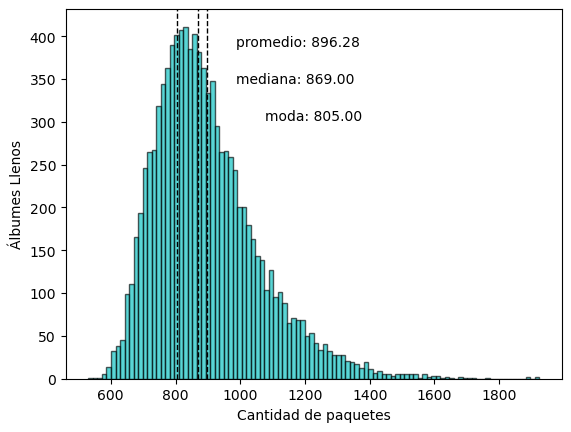

In [10]:
from scipy import stats

result = plt.hist(album_cant_paquetes, bins=100, color='c', edgecolor='k', alpha=0.65)

plt.axvline(album_cant_paquetes.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(album_cant_paquetes.mean()*1.1, max_ylim*0.9, 'promedio: {:.2f}'.format(album_cant_paquetes.mean()))
plt.axvline(np.median(album_cant_paquetes), color='k', linestyle='dashed', linewidth=1)
plt.text(album_cant_paquetes.mean()*1.1, max_ylim*0.8, 'mediana: {:.2f}'.format(np.median(album_cant_paquetes)))

m,a=stats.mode(album_cant_paquetes, keepdims=True)

plt.axvline(m[0], color='k', linestyle='dashed', linewidth=1)
plt.text(album_cant_paquetes.mean()*1.2, max_ylim*0.7, 'moda: {:.2f}'.format(m[0]))
plt.xlabel("Cantidad de paquetes")
plt.ylabel("Álbumes Llenos")
plt.show();

### Y en el caso más probable terminaré pagando

In [11]:
print("Pagando",np.median(album_cant_paquetes)*Valor_del_paquete, "pesos en el caso más probable")

Pagando 130350.0 pesos en el caso más probable


## Resultados:
* Es muy caro
* Podría bajar el costo si intercambio figuritas

## Mejoras ?